In [82]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


# Load the CSV file
csv_file = "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
data = pd.read_csv(csv_file, sep=',')

print(data.head())


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

In [83]:
print(data.shape)
with pd.option_context('display.max_columns', data.shape[1]):
    print(data.describe(include='all'))

(70692, 22)
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       

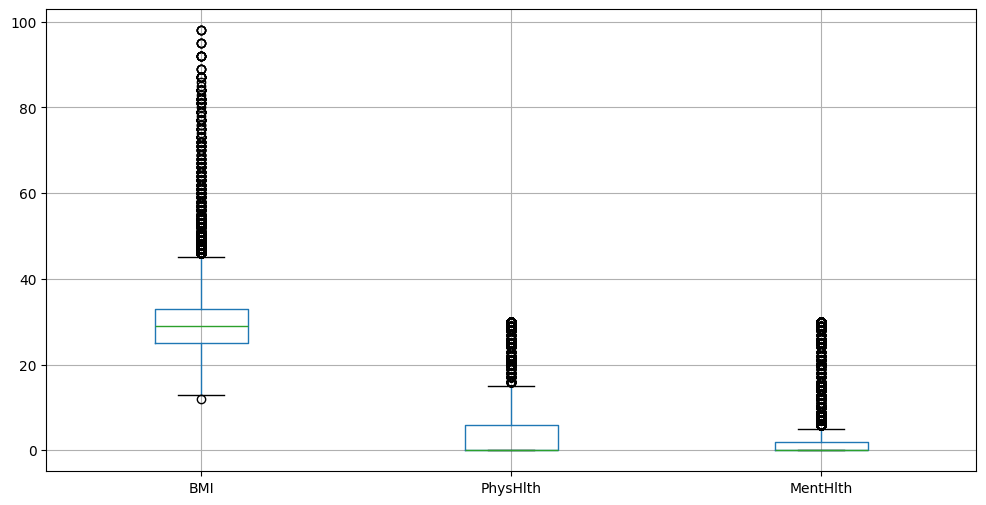

In [84]:
import numpy as np

# Ensure plots are displayed in the notebook
%matplotlib inline

data.boxplot(column=['BMI', 'PhysHlth', 'MentHlth'], figsize=(12, 6))
plt.show()


<Figure size 2000x1500 with 0 Axes>

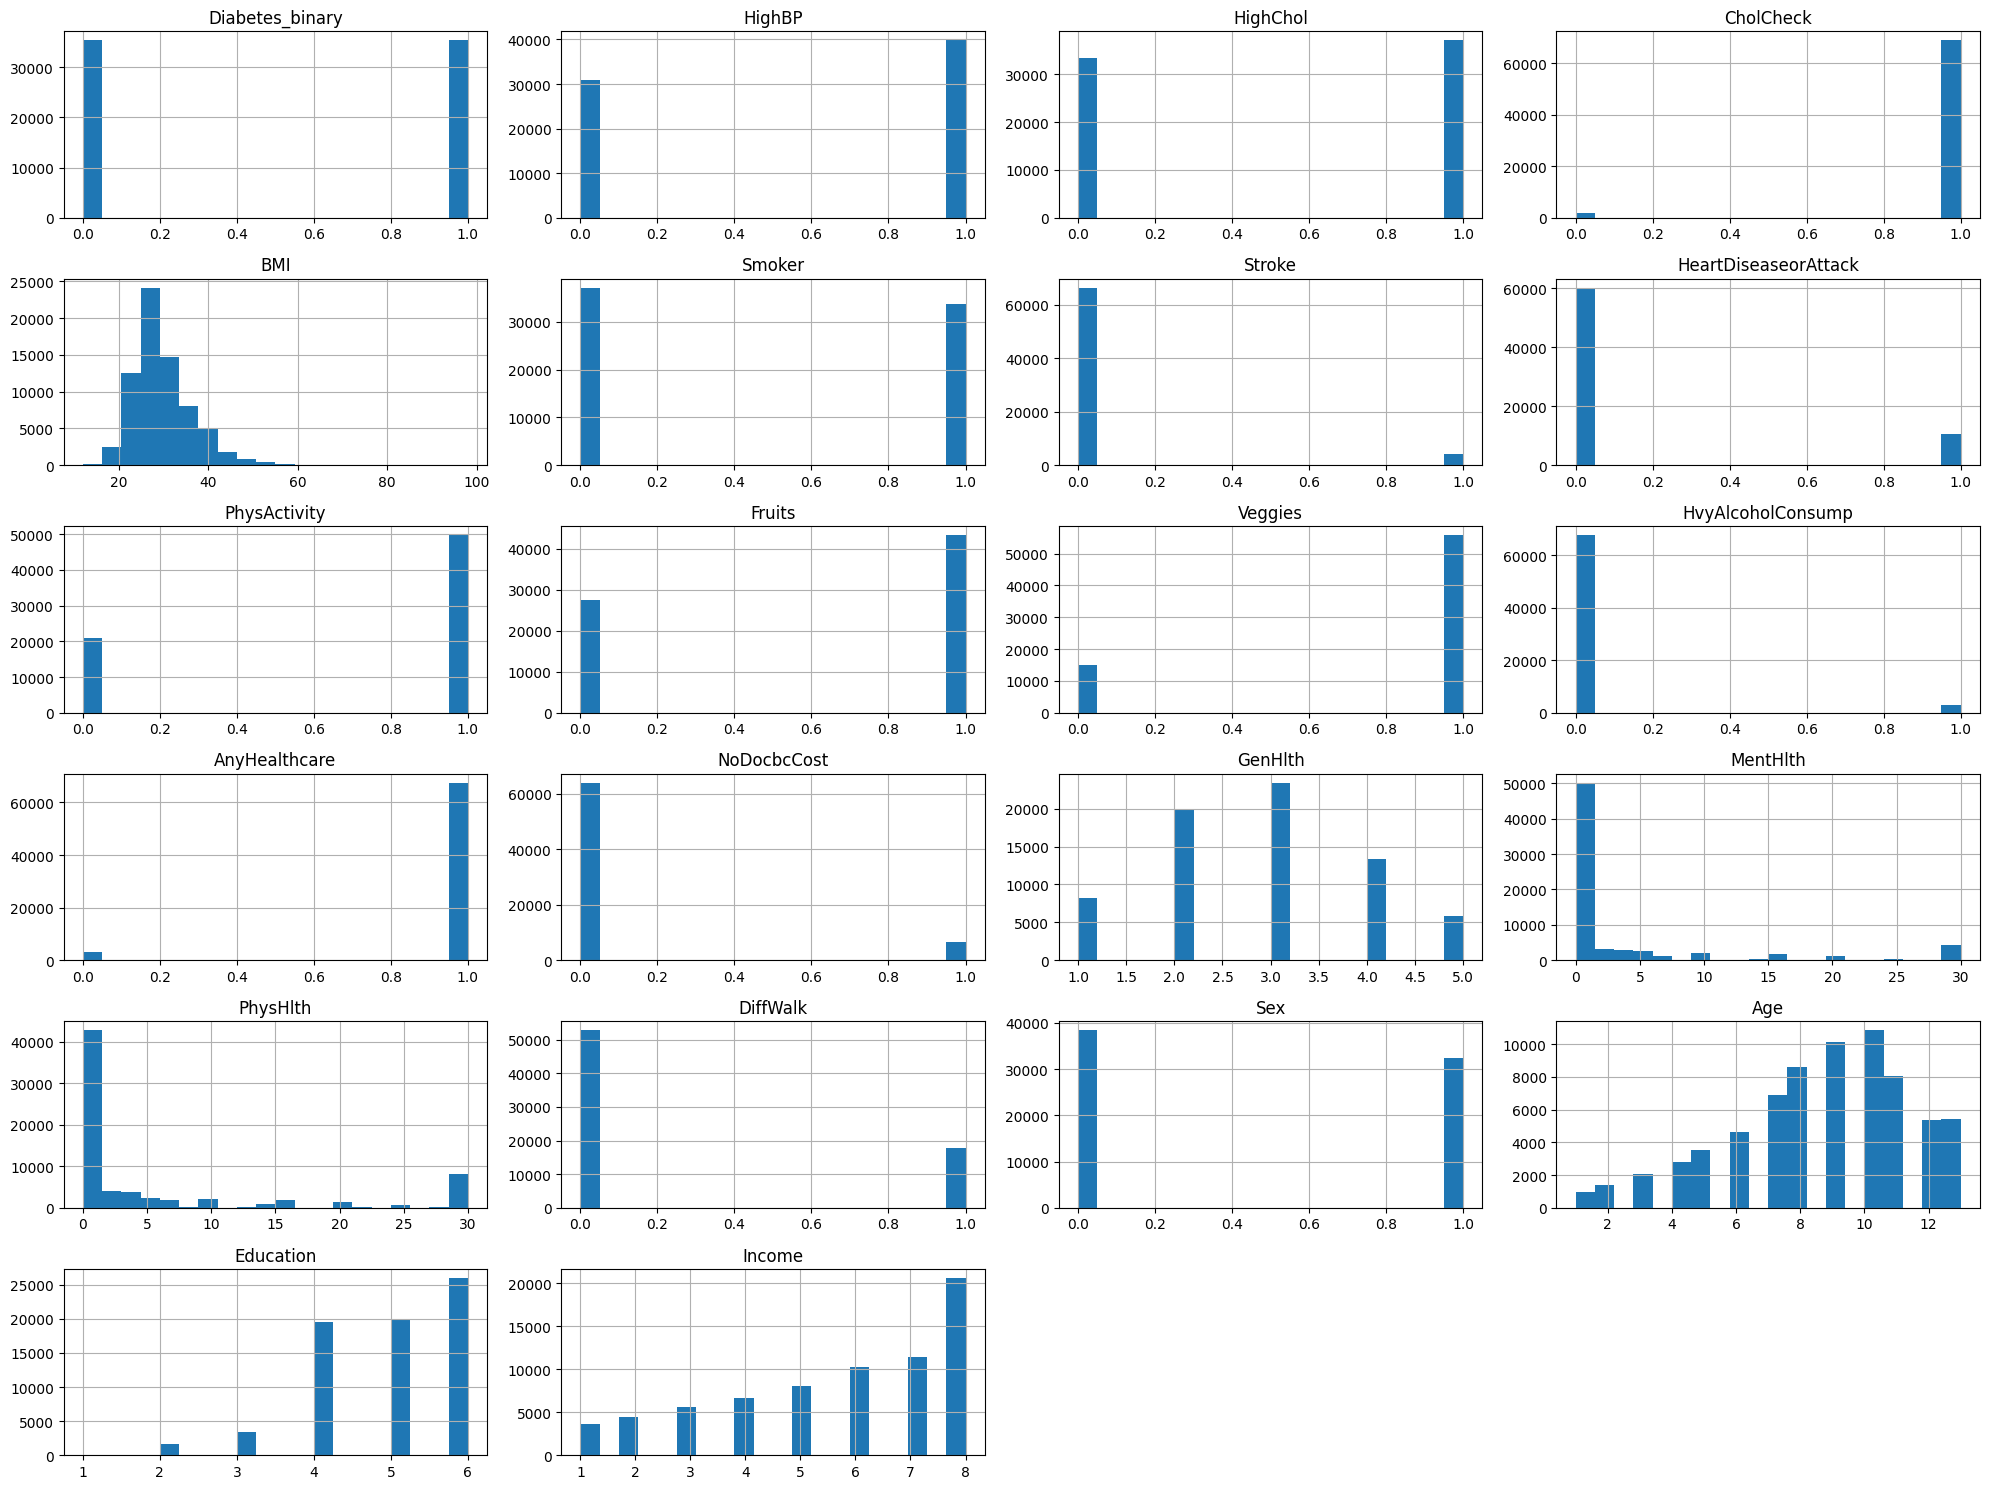

In [85]:
plt.figure(figsize=(20, 15))  # Ajuster la taille de la figure pour afficher plusieurs histogrammes
data.hist(bins=20, figsize=(20, 15), layout=(6, 4))  # Ajuster le layout en fonction du nombre de colonnes
plt.tight_layout()  # Ajuster les espacements entre les sous-graphiques
plt.show()

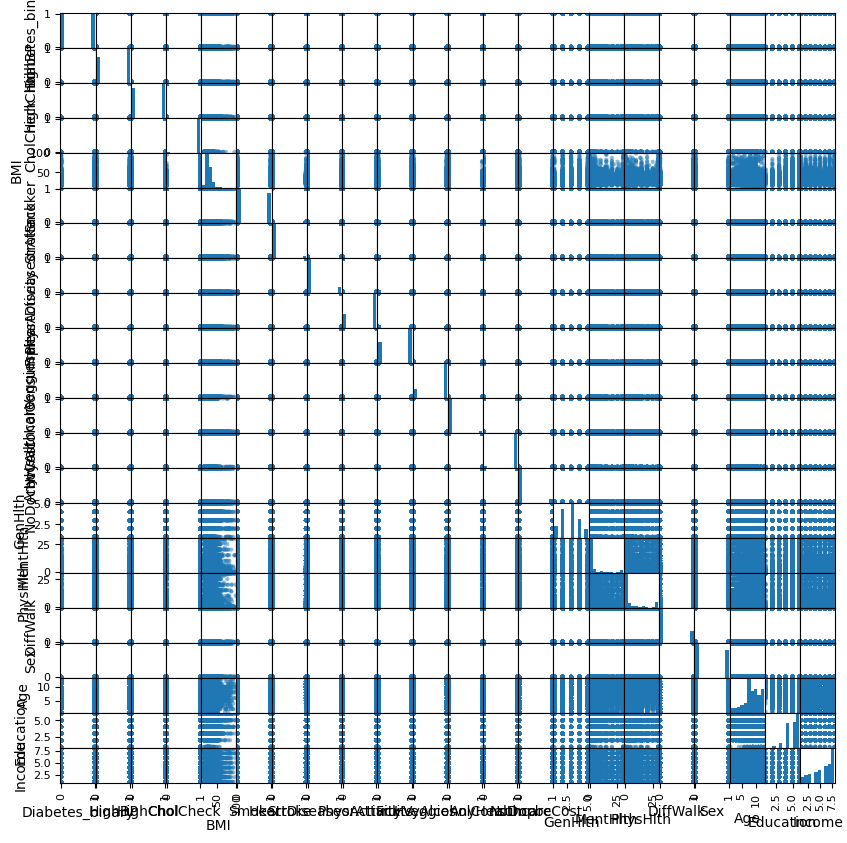

In [86]:
sm = scatter_matrix(data[data.columns],
                   figsize=(10,10))

plt.show()


In [87]:
for col in ['BMI', 'PhysHlth', 'MentHlth']:
    data[f'log_{col}'] = np.log1p(data[col])


corrmatrix = data.corr()
corrmatrix = corrmatrix.round(2)
corrmatrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,log_BMI,log_PhysHlth,log_MentHlth
Diabetes_binary,1.00,0.38,0.29,0.12,0.29,0.09,0.13,0.21,-0.16,-0.05,...,0.09,0.21,0.27,0.04,0.28,-0.17,-0.22,0.31,0.22,0.07
HighBP,0.38,1.00,0.32,0.10,0.24,0.09,0.13,0.21,-0.14,-0.04,...,0.06,0.17,0.23,0.04,0.34,-0.14,-0.19,0.26,0.19,0.05
HighChol,0.29,0.32,1.00,0.09,0.13,0.09,0.10,0.18,-0.09,-0.05,...,0.08,0.14,0.16,0.02,0.24,-0.08,-0.11,0.15,0.15,0.08
CholCheck,0.12,0.10,0.09,1.00,0.05,-0.00,0.02,0.04,-0.01,0.02,...,-0.01,0.03,0.04,-0.01,0.10,-0.01,0.01,0.05,0.03,-0.01
BMI,0.29,0.24,0.13,0.05,1.00,0.01,0.02,0.06,-0.17,-0.08,...,0.10,0.16,0.25,0.00,-0.04,-0.10,-0.12,0.98,0.18,0.11
Smoker,0.09,0.09,0.09,-0.00,0.01,1.00,0.06,0.12,-0.08,-0.07,...,0.09,0.12,0.12,0.11,0.11,-0.14,-0.10,0.02,0.11,0.08
Stroke,0.13,0.13,0.10,0.02,0.02,0.06,1.00,0.22,-0.08,-0.01,...,0.09,0.16,0.19,0.00,0.12,-0.07,-0.14,0.02,0.16,0.08
HeartDiseaseorAttack,0.21,0.21,0.18,0.04,0.06,0.12,0.22,1.00,-0.10,-0.02,...,0.08,0.20,0.23,0.10,0.22,-0.10,-0.15,0.07,0.20,0.07
PhysActivity,-0.16,-0.14,-0.09,-0.01,-0.17,-0.08,-0.08,-0.10,1.00,0.13,...,-0.13,-0.23,-0.28,0.05,-0.10,0.19,0.20,-0.17,-0.23,-0.12
Fruits,-0.05,-0.04,-0.05,0.02,-0.08,-0.07,-0.01,-0.02,0.13,1.00,...,-0.06,-0.05,-0.05,-0.09,0.06,0.10,0.08,-0.09,-0.05,-0.07


20601.01s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


20606.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


--2025-05-12 18:43:35--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 13023 (13K) [text/plain]
Enregistre : ‘visualization.py.4’

visualization.py.4  100%[===================>]  12,72K  --.-KB/s    ds 0s      

2025-05-12 18:43:36 (180 MB/s) - ‘visualization.py.4’ enregistré [13023/13023]



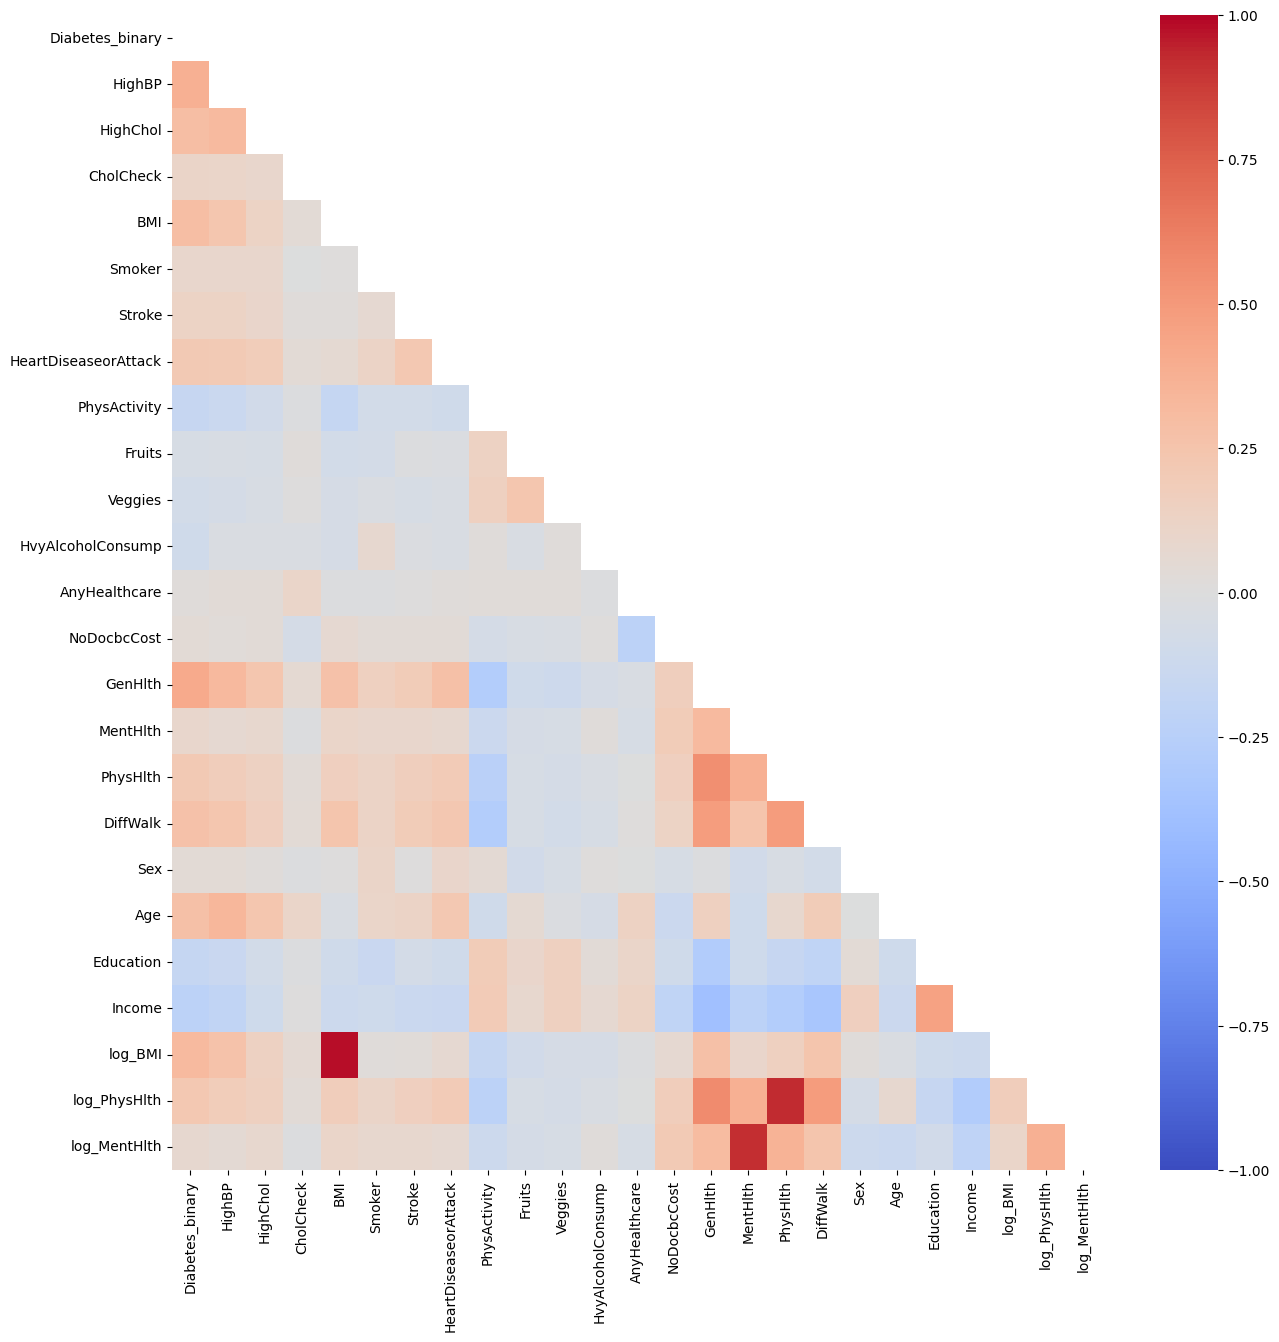

In [88]:
!pip install seaborn
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization
visualization.plot_corr(data, width=15, height=15,print_value=False)

In [90]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

feature_engineering.get_features_correlated_to_target(data, target_feature='Diabetes_binary')

20708.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


--2025-05-12 18:45:17--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 2593 (2,5K) [text/plain]
Enregistre : ‘feature_engineering.py.2’

feature_engineering 100%[===================>]   2,53K  --.-KB/s    ds 0s      

2025-05-12 18:45:17 (65,8 MB/s) - ‘feature_engineering.py.2’ enregistré [2593/2593]



Diabetes_binary         1.00
GenHlth                 0.41
HighBP                  0.38
log_BMI                 0.31
HighChol                0.29
BMI                     0.29
Age                     0.28
DiffWalk                0.27
Income                 -0.22
log_PhysHlth            0.22
HeartDiseaseorAttack    0.21
PhysHlth                0.21
Education              -0.17
PhysActivity           -0.16
Stroke                  0.13
CholCheck               0.12
Smoker                  0.09
MentHlth                0.09
HvyAlcoholConsump      -0.09
Veggies                -0.08
log_MentHlth            0.07
Fruits                 -0.05
NoDocbcCost             0.04
Sex                     0.04
AnyHealthcare           0.02
Name: Diabetes_binary, dtype: float64

In [92]:
most_corr_feats = feature_engineering.get_most_correlated(data)
most_corr_feats

BMI            log_BMI         0.982
PhysHlth       log_PhysHlth    0.929
MentHlth       log_MentHlth    0.922
GenHlth        log_PhysHlth    0.565
               PhysHlth        0.553
                               ...  
Stroke         Sex             0.004
AnyHealthcare  PhysHlth       -0.003
Sex            Age            -0.002
BMI            Sex             0.001
CholCheck      Veggies         0.000
Length: 300, dtype: float64